In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display as display
import librosa.feature
import sys
import os
import math

In [2]:
import soundfile as sf

def import_audio(filename): #Fungsi untuk ekstrak data time series dari audio
    """
    Extract audio given the filename (.wav, .flac, etc format)
    """

    audio, rate = sf.read(filename, always_2d=True)
    audio = np.reshape(audio, (1, -1))
    audio = audio[0]
    time = np.linspace(0, len(audio)/rate, len(audio), endpoint=False)
    return audio, rate, time

In [3]:
audio_filename = 'classification/cough/test_010.wav'
noise_filename = 'sample_noise/noise-free-sound-0001.wav'

In [4]:
audio, audio_rate, audio_time = import_audio(audio_filename)
noise, _, _ = import_audio(noise_filename)
noise = noise[0:len(audio)]

In [5]:
import math 

def add_noise(audio, noise, snr, rate): #Fungis untuk penambahan noise atau dengan kata lain mixing audio
    noise = noise[0:audio.shape[0]]
    if len(audio) > len(noise):
        noise_add = noise[0:(len(audio)-len(noise))]
        noise = np.append(noise, noise_add)

    audio_RMS = rmsValue(audio,len(audio))
    noise_RMS = rmsValue(noise,len(noise))
    noise_RMS_new = audio_RMS / pow(10,(snr/20))
    noise = noise*(noise_RMS_new/noise_RMS)
    snr_check = 20 * np.log10(audio_RMS/rmsValue(noise,len(noise)))
    print("noise added with SNR = " + str(round(snr_check)))
    noised = audio + noise
    noised_rate = rate

    return noised, noised_rate, round(snr_check)


def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
     
    for i in range(0,n):
        square += (arr[i]**2)

    mean = (square / (float)(n))
    root = math.sqrt(mean)
     
    return root
 

def pad(audio, pad_length):
    shape = np.shape(audio)
    padded_audio = np.zeros(pad_length)
    padded_audio[0:shape[0]] = audio

    return padded_audio

In [6]:
SNR = 15
mixture, _, _ = add_noise(audio, noise, SNR, audio_rate)

noise added with SNR = 15


In [7]:
def extract_tf_mask(audio, noise, n_fft=1024, hop_length=512, win_length=1024):
    y = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    n = librosa.stft(noise, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

    mask = ((np.abs(y)) / (np.abs(n)))
    
    n_frames = abs(n).shape[-1]

    return y, n, mask, n_frames

In [8]:
def graph_stft(audio_mag, title=False):
    plt.figure()
    display.specshow(librosa.amplitude_to_db(audio_mag, ref=np.mean), y_axis='log', x_axis='time')
    # display.specshow(audio_mag, y_axis='log', x_axis='time')
    
    plt.colorbar(format="%+2.0f dB")
    if (title):
        plt.title('Power Spectrogram')
    plt.tight_layout()

In [9]:
audio_tf, mixtured_tf, tf_mask, _ = extract_tf_mask(audio, noise)

In [10]:
audio_masking = mixtured_tf * tf_mask
audio_istft = librosa.istft(audio_masking, hop_length=512, win_length=1024)

C:\Users\Zanja\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


NameError: name 'female_rate' is not defined

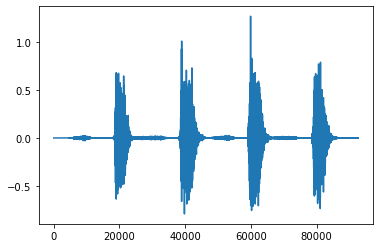

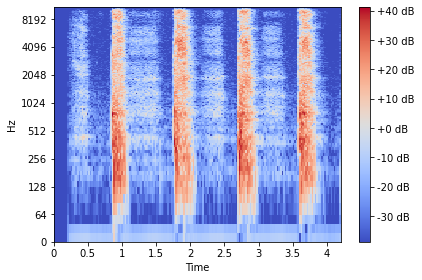

In [11]:
plt.plot(audio_istft)
graph_stft(audio_tf)
ipd.Audio(audio_istft, rate=female_rate)

In [ ]:
plt.plot(audio)
ipd.Audio(audio, rate=female_rate)

In [ ]:
plt.plot(mixture)
ipd.Audio(mixture, rate=female_rate)

In [ ]:
import os
import sys
import librosa as lb
sys.path.append(os.path.abspath('script'))
from feature_class import features
from DSP import classify_cough
from scipy.io import wavfile
import pickle
import shutil
import pandas as pd

In [ ]:
loaded_model = pickle.load(open(os.path.join('models', 'cough_classifier'), 'rb'))
loaded_scaler = pickle.load(open(os.path.join('models','cough_classification_scaler'), 'rb'))

In [ ]:
probability = classify_cough(audio_istft, female_rate, loaded_model, loaded_scaler)
value = round(probability*100,2)
print(value)

In [ ]:
probability = classify_cough(audio, female_rate, loaded_model, loaded_scaler)
value = round(probability*100,2)
print(value)

In [ ]:
probability = classify_cough(mixture, female_rate, loaded_model, loaded_scaler)
value = round(probability*100,2)
print(value)